In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [4]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [12]:
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols =["time",'wind_gust_o'],
                          parse_dates=["time"]).dropna().set_index("time")

pd.options.display.max_rows = 999
station["wind_gust_o"].value_counts(normalize=True).map(lambda n: '{:.1%}'.format(n))

M                     95.7%
12.346656              0.4%
11.317768000000001     0.4%
10.803324              0.4%
11.832212              0.3%
12.8611                0.3%
10.28888               0.3%
13.375544              0.3%
13.889988              0.2%
9.774436               0.2%
14.404432              0.2%
14.918876000000001     0.1%
9.259992               0.1%
15.43332               0.1%
8.745548               0.1%
15.947764000000001     0.1%
16.462208              0.1%
16.976652              0.1%
8.231104               0.1%
17.491096              0.1%
7.71666                0.1%
18.00554               0.0%
7.202216               0.0%
6.687772               0.0%
18.519984              0.0%
19.034428000000002     0.0%
20.063316              0.0%
20.57776               0.0%
19.548872              0.0%
21.092204              0.0%
22.635536000000002     0.0%
22.121092              0.0%
21.606648              0.0%
23.14998               0.0%
6.173328               0.0%
24.693312           

In [13]:
#label gust/no gust

station["wind_gust_l"] = "Gust"
mask = station['wind_gust_o'].str.contains("M")
station.loc[mask,["wind_gust_l"]] = "No Gust"

print(station.sample(100))
print("*****************************")
station["wind_gust_l"].value_counts(normalize=True)

                            wind_gust_o wind_gust_l
time                                               
2020-03-15 03:00:00                   M     No Gust
2020-12-11 17:00:00                   M     No Gust
2020-02-23 21:30:00                   M     No Gust
2019-10-22 20:30:00                   M     No Gust
2020-05-25 05:00:00                   M     No Gust
2019-01-10 20:00:00                   M     No Gust
2019-05-08 13:30:00  14.918876000000001        Gust
2020-06-22 01:30:00                   M     No Gust
2020-09-26 09:00:00                   M     No Gust
2020-07-30 15:00:00                   M     No Gust
2020-02-27 20:30:00                   M     No Gust
2019-02-09 09:00:00                   M     No Gust
2020-06-10 15:30:00                   M     No Gust
2020-09-27 00:30:00                   M     No Gust
2020-04-30 21:30:00                   M     No Gust
2019-04-21 02:30:00                   M     No Gust
2020-01-19 00:30:00            8.745548        Gust
2018-09-17 0

No Gust    0.956808
Gust       0.043192
Name: wind_gust_l, dtype: float64

**Forecast D0**

In [14]:
#ria forecast d0
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD0.csv",parse_dates=["time"]).set_index("time")

model1k

,Unnamed: 0,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-01 01:00:00,0,143.268921,0.0,1801.360962,0.789023,1.467980,103158.796875,280.410004,0.823894,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5730.042969,1595.621948,253.857193,283.275238
2019-01-01 02:00:00,1,152.222214,0.0,1766.035156,1.437459,2.645142,103178.460938,279.987000,0.822755,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5729.319824,1597.058472,253.848557,282.842499
2019-01-01 03:00:00,2,154.053619,0.0,1728.199341,1.304144,2.414089,103142.132812,279.750885,0.820316,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.619141,1593.626953,253.876816,282.377808
2019-01-01 04:00:00,3,162.321548,0.0,1716.658325,1.242218,2.291945,103172.617188,279.614197,0.806320,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5725.305664,1596.243408,253.810440,282.195923
2019-01-01 05:00:00,4,167.243256,0.0,1718.675293,0.790160,1.460847,103175.796875,279.555634,0.787751,24135.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,5724.179199,1596.257935,253.821121,282.136566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,16762,316.116913,0.0,800.844543,5.403949,10.236845,101375.132812,279.880554,0.861849,24050.560547,...,22.750000,-12.612812,0.0,0.000000,0.0,0.000000,5360.758301,1434.292603,243.570251,271.706177
2020-12-31 20:00:00,16763,318.488983,0.0,708.539551,4.331174,8.753118,101517.437500,279.643799,0.881646,24048.224609,...,34.250000,-4.223125,0.0,0.300000,0.1,0.300000,5362.556641,1437.166504,242.893250,271.008636
2020-12-31 21:00:00,16764,314.300262,0.0,763.025513,3.515929,6.365382,101593.578125,279.461945,0.917659,24056.218750,...,30.620001,-5.149188,0.0,0.070246,0.0,0.070246,5366.014160,1441.580811,242.227005,271.706116


In [15]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).drop(columns=["wind_gust_o","Unnamed: 0"]).dropna()
df_all1k.sample(100)

,wind_gust_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-06-22 21:00:00,No Gust,125.270012,0.000000e+00,2248.567627,1.599321,7.061481,101431.882812,287.738007,0.812000,24070.378906,...,0.000000,1.171875e-04,0.600000,0.500000,0.800000,0.800000,5662.498047,1475.362061,261.506195,283.990875
2020-08-26 18:00:00,No Gust,283.557556,0.000000e+00,3192.203613,5.515675,7.481216,102143.335938,293.614105,0.909587,24035.138672,...,0.000000,7.500000e-04,0.000000,0.111382,0.000000,0.111382,5832.174316,1561.388184,267.183197,288.227448
2020-06-02 12:00:00,No Gust,275.262512,0.000000e+00,2713.123291,4.799296,5.361653,101429.515625,296.961700,0.623618,24135.000000,...,221.759995,-6.493914e+01,0.400000,0.000000,0.000000,0.400000,5680.281738,1509.938843,259.629364,285.638123
2019-08-09 19:00:00,No Gust,227.858414,0.000000e+00,2478.404297,3.252623,7.360898,101871.531250,290.111298,0.927518,24039.119141,...,76.320000,-6.560703e-01,0.200000,0.420000,0.000000,0.420000,5697.236816,1513.021240,262.951447,282.235565
2019-10-29 01:00:00,No Gust,177.054489,1.000000e-25,2135.283447,2.089631,3.604065,101599.710938,286.957886,1.000000,24234.414062,...,34.450001,-1.025574e+01,0.231992,0.033291,0.000000,0.231992,5646.040039,1493.975464,257.010254,281.124573
2020-02-25 19:00:00,No Gust,327.890167,0.000000e+00,1468.344238,2.828584,6.642087,102576.679688,281.323303,0.925183,24234.113281,...,3.676000,-1.728266e+00,0.000000,0.224008,0.000000,0.224008,5624.938965,1518.011841,256.499573,275.156189
2019-07-26 20:00:00,No Gust,273.917847,0.000000e+00,2073.072021,3.010381,4.948587,101656.179688,288.509003,0.887902,24062.349609,...,18.809999,-1.146562e+01,0.000000,0.000000,0.400000,0.400000,5684.121582,1492.860840,263.919373,280.522430
2019-04-19 05:00:00,No Gust,8.792475,0.000000e+00,1293.932373,4.636466,8.011704,101484.828125,283.783905,0.879506,24048.755859,...,0.000000,2.617188e-04,0.000000,0.000000,0.200000,0.200000,5523.304199,1464.610352,252.773743,277.611755
2019-03-17 20:00:00,No Gust,8.779006,0.000000e+00,1042.708008,7.413128,12.120733,102733.281250,280.193298,0.803256,24135.000000,...,0.000000,-4.843750e-04,0.000000,0.000000,0.000000,0.000000,5592.588867,1517.110229,252.983063,275.040985


In [17]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)


100%|██████████| 29/29 [01:07<00:00,  2.32s/it]


In [18]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.85,0.81,None,0.89,0.21
PassiveAggressiveClassifier,0.91,0.80,None,0.93,0.21
GaussianNB,0.86,0.80,None,0.90,0.12
QuadraticDiscriminantAnalysis,0.84,0.78,None,0.88,0.28
SGDClassifier,0.95,0.77,None,0.96,0.24
BernoulliNB,0.82,0.76,None,0.87,0.20
LinearDiscriminantAnalysis,0.96,0.74,None,0.96,0.35
XGBClassifier,0.97,0.69,None,0.96,4.20
Perceptron,0.94,0.67,None,0.94,0.20


**ML LGBMClassifier**


Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           70       68   138
No Gust       101     3055  3156
All           171     3123  3294
Heidke Skill Score: 0.43

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.41    0.51      0.45   138.00
No Gust            0.98    0.97      0.97  3156.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.69    0.74      0.71  3294.00
weighted avg       0.95    0.95      0.95  3294.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           68       85   153
No Gust        98     3043  3141
All           166     3128  3294
Heidke Skill Score: 0.4

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.41    0.44      0.43   153.00
No Gust            0.97  

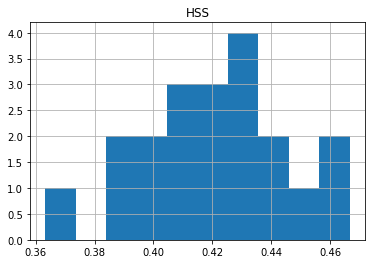

In [24]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop random
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = NearestCentroid().fit(X_train,y_train)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();

**Add time features**

In [25]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.weekofyear

In [27]:

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)
models

100%|██████████| 29/29 [01:07<00:00,  2.34s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.85,0.80,None,0.89,0.16
QuadraticDiscriminantAnalysis,0.80,0.79,None,0.86,0.24
GaussianNB,0.85,0.79,None,0.89,0.12
BernoulliNB,0.81,0.75,None,0.86,0.18
LinearDiscriminantAnalysis,0.95,0.73,None,0.95,0.28
BaggingClassifier,0.96,0.70,None,0.96,6.91
SGDClassifier,0.95,0.70,None,0.95,0.27
ExtraTreesClassifier,0.96,0.70,None,0.96,1.48
LabelPropagation,0.94,0.69,None,0.94,9.17



Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           59       70   129
No Gust        81     3084  3165
All           140     3154  3294
Heidke Skill Score: 0.41

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.42    0.46      0.44   129.00
No Gust            0.98    0.97      0.98  3165.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.70    0.72      0.71  3294.00
weighted avg       0.96    0.95      0.96  3294.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           68       80   148
No Gust        82     3064  3146
All           150     3144  3294
Heidke Skill Score: 0.43

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.45    0.46      0.46   148.00
No Gust            0.97 

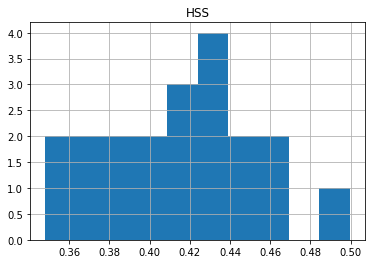

In [34]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro

#select x variables
#x_var = df_all1k.drop(columns=["Unnamed: 0","wxcodes_o","brfg_l"]).columns.to_list()  

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k.iloc[:,1:]

# loop ranadom
HSS = []
for t in range (0,20):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model=LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadísticas HSS")
# if p-value is lower than 5%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
print(pd.DataFrame(HSS,columns=["HSS"]).describe())

print(shapiro(HSS))
pd.DataFrame(HSS,columns=["HSS"]).hist();


In [35]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("gust_LEVX_1km_time_d0.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


In [32]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

#select x variables
x_var = df_all1k.drop(columns=["wind_gust_l"]).columns.to_list() 

# X and Y
Y = df_all1k.wind_gust_l
X = df_all1k[x_var]

# loop ranadom
HSS = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  ml_model = ExtraTreesClassifier(n_estimators=125).fit(X_res,y_res)

  #Confussion matrix

  print("\nMatriz de Confusión  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS[t],2))

  #quality report

  print("\nInforme de calidad desagregado (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nEstadiísticas HSS")
pd.DataFrame(HSS,columns=["HSS"]).describe()


Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           57       51   108
No Gust        80     2283  2363
All           137     2334  2471
Heidke Skill Score: 0.44

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.42    0.53      0.47   108.00
No Gust            0.98    0.97      0.97  2363.00
accuracy           0.95    0.95      0.95     0.95
macro avg          0.70    0.75      0.72  2471.00
weighted avg       0.95    0.95      0.95  2471.00

Matriz de Confusión  (Machine Learning)

col_0        Gust  No Gust   All
wind_gust_l                     
Gust           71       48   119
No Gust        80     2272  2352
All           151     2320  2471
Heidke Skill Score: 0.5

Informe de calidad desagregado (Machine Learning)

              precision  recall  f1-score  support
Gust               0.47    0.60      0.53   119.00
No Gust            0.98  

,HSS
count,10.00
mean,0.48
std,0.03
min,0.43
25%,0.45
50%,0.48
75%,0.51
max,0.52
